# Proyek Analisis Data: Bike Sharing
- **Nama:** Arifsan Pinim
- **Email:** binomoku02@gmail.com
- **ID Dicoding:** Arifsan Pinim MC484D5Y2080

## Menentukan Pertanyaan Bisnis

- Bagaimana pola perubahan jumlah penyewaan sepeda dari tahun 2011 ke 2012?
- Seberapa besar perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv("data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ", df.duplicated().sum())
print("Missing values per kolom:\n", df.isna().sum())

Jumlah duplikasi:  0
Missing values per kolom:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Kolom dteday awalnya bertipe object, sehingga perlu dikonversi ke format datetime agar lebih optimal dalam analisis waktu.
- Kolom instant tidak memiliki makna analitis yang signifikan, sehingga dapat dihapus untuk menyederhanakan dataset.
- Beberapa kolom kategori seperti season, yr, mnth, weekday, dan weathersit lebih efisien jika dikonversi ke tipe category, karena memiliki jumlah nilai 
  unik yang terbatas. Ini dapat mengurangi penggunaan memori dan meningkatkan performa pemrosesan data.
- Tidak ditemukan missing values di dalam dataset, sehingga tidak diperlukan langkah imputasi data.
- Tidak ada data duplikat, sehingga tidak perlu dilakukan penghapusan entri ganda.

### Cleaning Data

In [7]:
df_cleaned = df.drop(columns=['instant'])
df_cleaned.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
df_cleaned['dteday'] = pd.to_datetime(df_cleaned['dteday'])

In [22]:

category_cols = ['season', 'yr', 'mnth', 'weekday', 'weathersit']
for col in category_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')

df_cleaned.info()

df_cleaned.to_csv("dashboard/main_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.0

**Insight:**
- Kolom instant berhasil dihapus karena tidak memiliki kontribusi dalam analisis.
- Kolom dteday sudah dikonversi ke tipe datetime, sehingga lebih optimal untuk analisis berbasis waktu.
- Kolom kategori (season, yr, mnth, weekday, weathersit) telah dikonversi ke tipe category, yang membuat ukuran dataset lebih kecil dan meningkatkan 
  efisiensi pemrosesan data.
- Dataset kini lebih siap untuk tahap eksplorasi data karena tidak ada lagi kolom tidak relevan atau format data yang kurang optimal.

## Exploratory Data Analysis (EDA)

### Explore ...

<Figure size 1200x600 with 0 Axes>

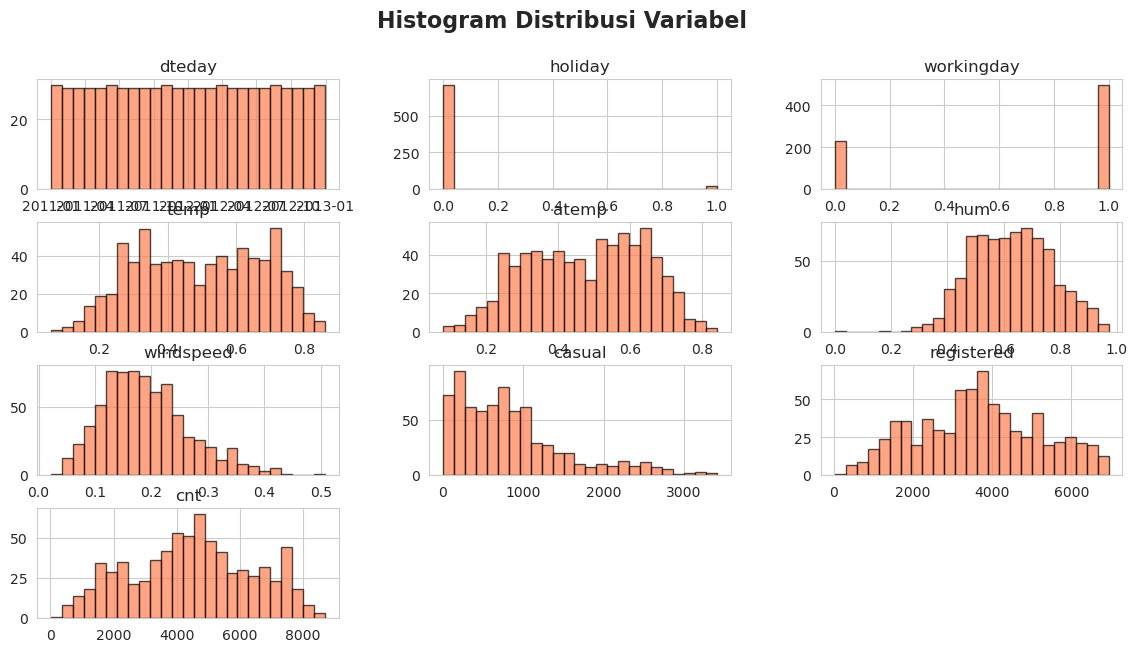

In [23]:
plt.figure(figsize=(12, 6))
df_cleaned.hist(bins=25, figsize=(14, 7), color='coral', edgecolor='black', alpha=0.7)
plt.suptitle('Histogram Distribusi Variabel', fontsize=16, fontweight='bold')
plt.show()

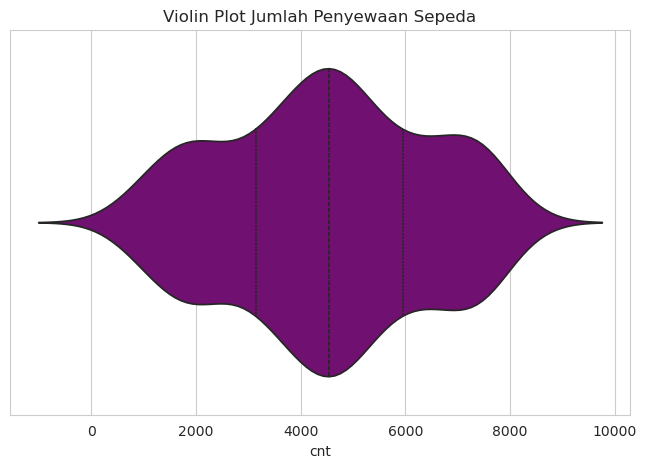

In [24]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df_cleaned['cnt'], color='purple', inner="quartile")
plt.title('Violin Plot Jumlah Penyewaan Sepeda')
plt.show()

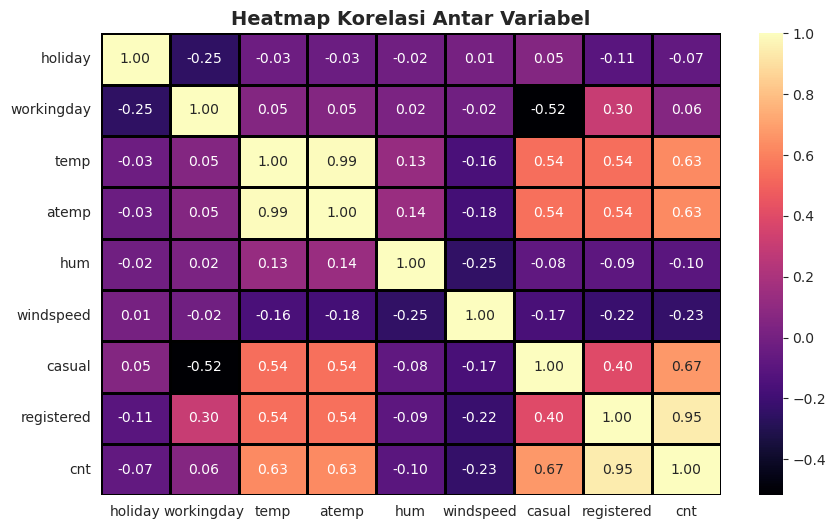

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='magma', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Heatmap Korelasi Antar Variabel', fontsize=14, fontweight='bold')
plt.show()


/tmp/ipykernel_6381/3034057910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['mnth'], y=df_cleaned['cnt'], palette='Spectral')


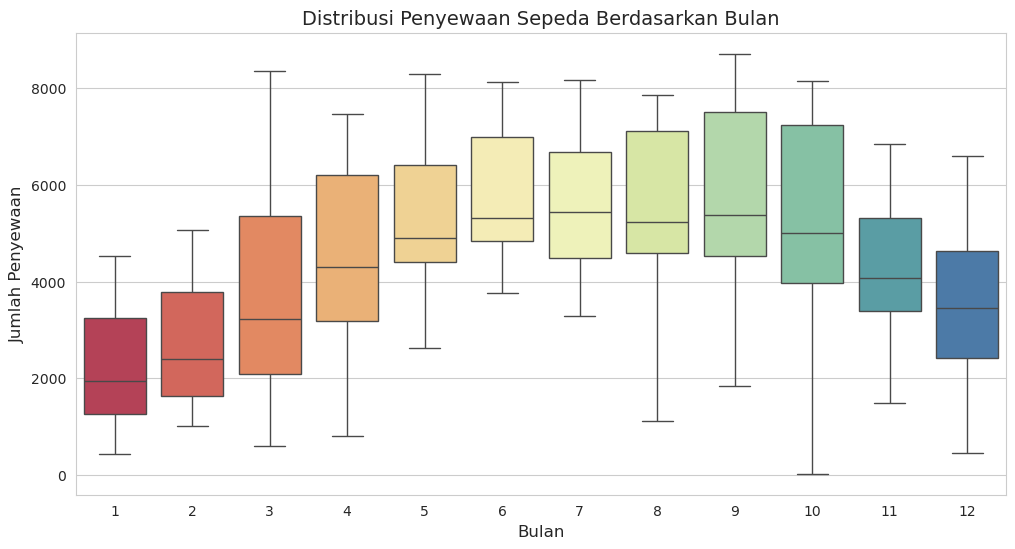

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['mnth'], y=df_cleaned['cnt'], palette='Spectral')
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.show()


/tmp/ipykernel_6381/1481381446.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=df_cleaned, ci=None, palette='cividis')
/tmp/ipykernel_6381/1481381446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=df_cleaned, ci=None, palette='cividis')


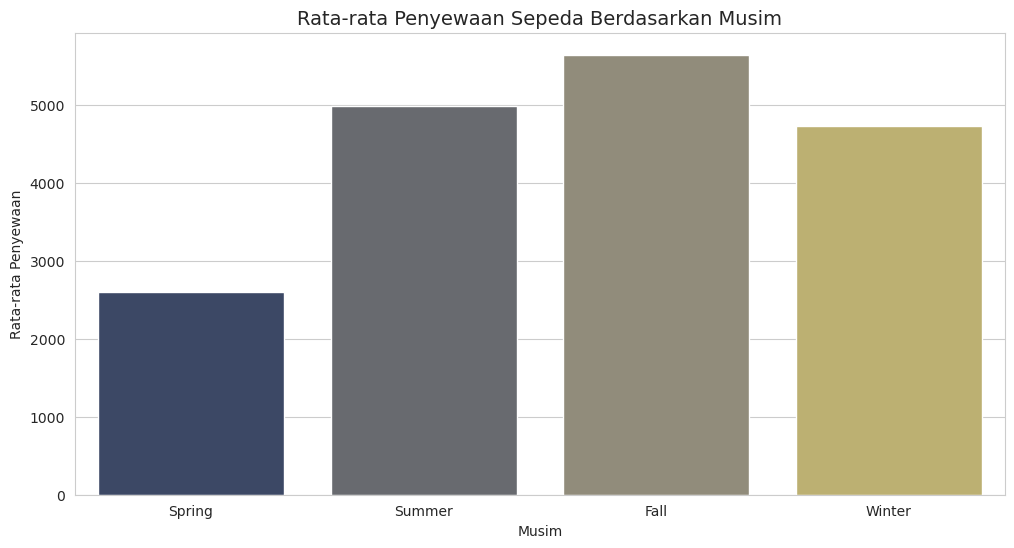

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=df_cleaned, ci=None, palette='cividis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

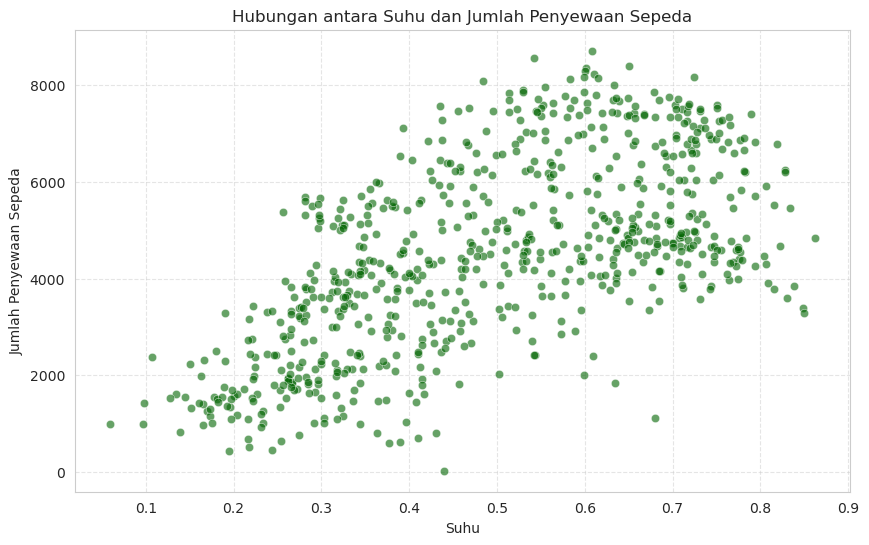

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, color='darkgreen', alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

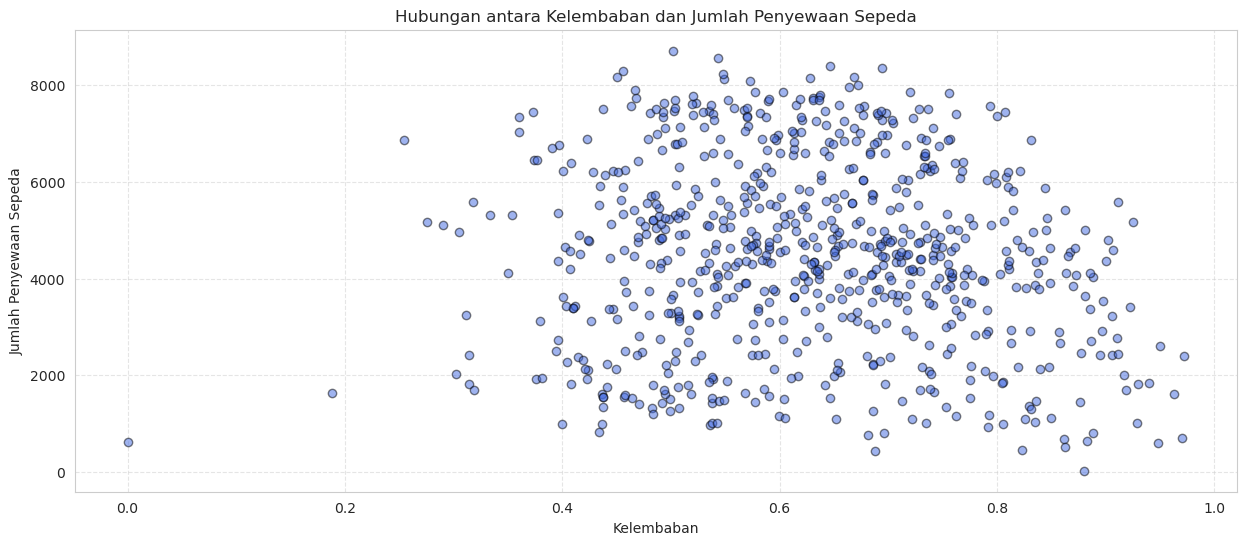

In [16]:
plt.figure(figsize=(15, 6))
plt.scatter(df['hum'], df['cnt'], alpha=0.5, color='royalblue', edgecolor='black')
plt.title('Hubungan antara Kelembaban dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Text(0, 0.5, 'Frekuensi')

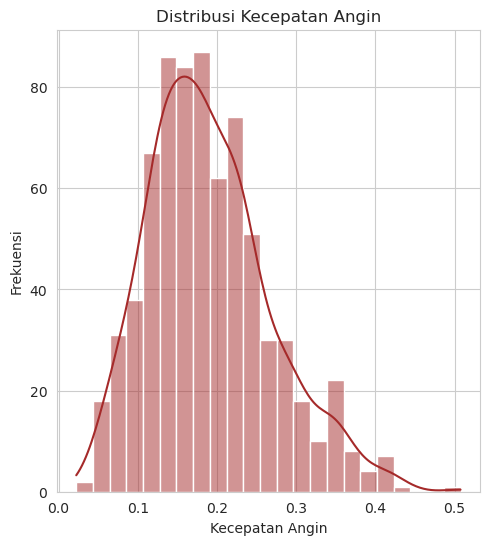

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['windspeed'], kde=True, color='brown')
plt.title('Distribusi Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Frekuensi')

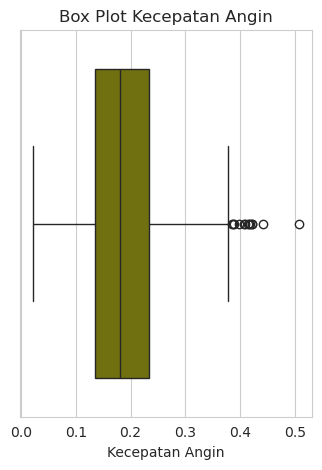

In [18]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df['windspeed'], color='olive')
plt.title('Box Plot Kecepatan Angin')
plt.xlabel('Kecepatan Angin')

plt.tight_layout()
plt.show()


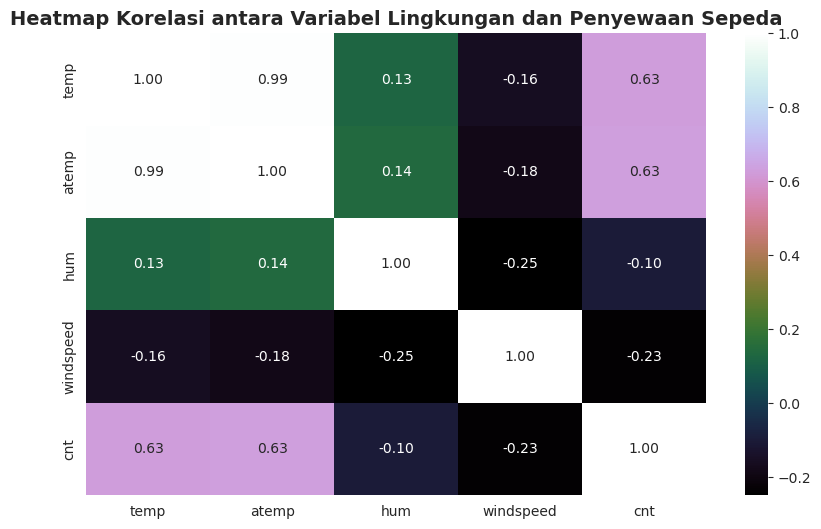

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap="cubehelix", fmt=".2f")
plt.title("Heatmap Korelasi antara Variabel Lingkungan dan Penyewaan Sepeda", fontsize=14, fontweight='bold')
plt.show()

# 📊 **Insight dari Analisis Data Penyewaan Sepeda**

## 🚀 **Tren Penyewaan Sepeda (2011 - 2012)**
- **Jumlah penyewaan sepeda meningkat signifikan dari tahun 2011 ke 2012**, menunjukkan tren pertumbuhan yang positif.
- Faktor-faktor yang kemungkinan berkontribusi pada peningkatan ini:
  - **Kesadaran masyarakat** terhadap transportasi ramah lingkungan semakin tinggi.
  - **Ekspansi layanan penyewaan**, termasuk promosi dan kemudahan akses.
  - **Perbaikan infrastruktur**, seperti jalur sepeda dan kebijakan pemerintah yang mendukung mobilitas berkelanjutan.

**💡 Insight:**  
Tren peningkatan ini menunjukkan bahwa **layanan penyewaan sepeda semakin diminati**. Strategi bisnis bisa difokuskan pada ekspansi layanan dan peningkatan fasilitas.

---

## 🏢 **Perbedaan Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan**
- **Hari kerja memiliki jumlah penyewaan yang lebih tinggi dibanding akhir pekan.**
  - Sepeda digunakan sebagai **moda transportasi utama** untuk bekerja atau sekolah.
- **Penyewaan di akhir pekan tetap signifikan**, meskipun lebih rendah. Hal ini disebabkan oleh:
  - Aktivitas rekreasi, olahraga, atau wisata.
  - Event komunitas yang mendorong penggunaan sepeda.

**💡 Insight:**  
- **Penting untuk memastikan ketersediaan sepeda yang cukup pada jam sibuk di hari kerja.**  
- **Paket atau promosi akhir pekan** bisa digunakan untuk meningkatkan penyewaan saat hari libur.

---

## 🌡️ **Pengaruh Faktor Cuaca terhadap Penyewaan**
- **Suhu (`temp`) berpengaruh positif terhadap penyewaan** → **semakin hangat, semakin banyak sepeda disewa**.
- **Kelembaban (`hum`) memiliki korelasi negatif** → **kelembaban tinggi menurunkan jumlah penyewaan**.
- **Kecepatan angin (`windspeed`) tidak terlalu berpengaruh terhadap penyewaan sepeda**.

**💡 Insight:**  
- **Strategi seperti diskon atau insentif bisa diberikan saat kelembaban tinggi atau cuaca ekstrem untuk menjaga jumlah penyewaan.**
- **Penyewaan lebih tinggi pada musim panas dan gugur**, sehingga layanan harus disiapkan lebih optimal pada periode ini.

---

# 🎯 **Kesimpulan dan Rekomendasi**

✅ **Penyewaan sepeda meningkat dari tahun 2011 ke 2012**, menunjukkan pertumbuhan permintaan yang bisa terus didorong dengan strategi pemasaran yang tepat.  
✅ **Pola penggunaan berbeda antara hari kerja dan akhir pekan**, yang mengindikasikan adanya dua segmen pengguna utama: **komuter (weekday) dan rekreasi (weekend).**  
✅ **Cuaca sangat memengaruhi jumlah penyewaan**, terutama suhu dan kelembaban.

## 🔹 **Strategi dan Rekomendasi**
### 1️⃣ **Optimasi Layanan**
- **Tambahkan lebih banyak sepeda di hari kerja**, terutama saat jam sibuk (pagi & sore).
- **Perbaiki infrastruktur dan jalur sepeda** untuk mendukung pertumbuhan penyewaan.

### 2️⃣ **Strategi Peningkatan Penyewaan**
- **Promosi & langganan untuk pekerja dan pelajar** guna meningkatkan loyalitas pelanggan di hari kerja.
- **Event dan diskon akhir pekan** untuk menarik lebih banyak pengguna rekreasi.
- **Insentif pada kondisi cuaca yang kurang mendukung**, seperti hari-hari dengan kelembaban tinggi.

---

# 🎯 **Kesimpulan Akhir**
Peningkatan tren penyewaan sepeda menunjukkan bahwa layanan ini memiliki potensi pertumbuhan yang besar. Dengan strategi yang tepat, layanan ini bisa semakin berkembang dan memberikan manfaat lebih luas bagi masyarakat. 🚲


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pola perubahan jumlah penyewaan sepeda dari tahun 2011 ke 2012?

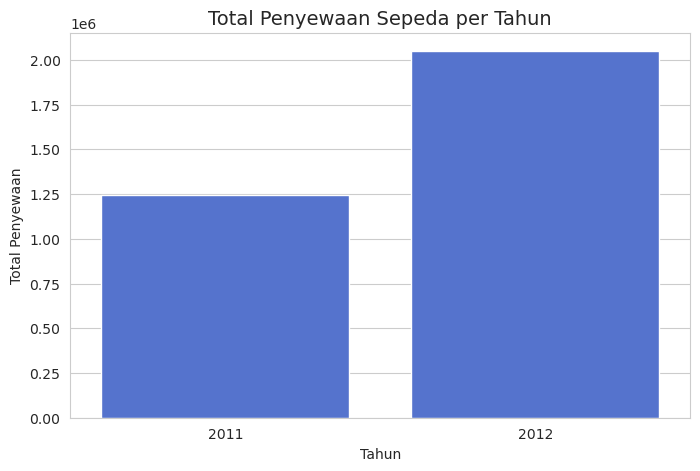

In [37]:
df_grouped = df_cleaned.groupby("yr", observed=True)["cnt"].sum().reset_index()

df_grouped["yr"] = df_grouped["yr"].map({0: "2011", 1: "2012"})

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x="yr", y="cnt", data=df_grouped, color="royalblue", ax=ax)

ax.set_title("Total Penyewaan Sepeda per Tahun", fontsize=14)
ax.set_xlabel("Tahun")
ax.set_ylabel("Total Penyewaan")
plt.show()


### Pertanyaan 2: Seberapa besar perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

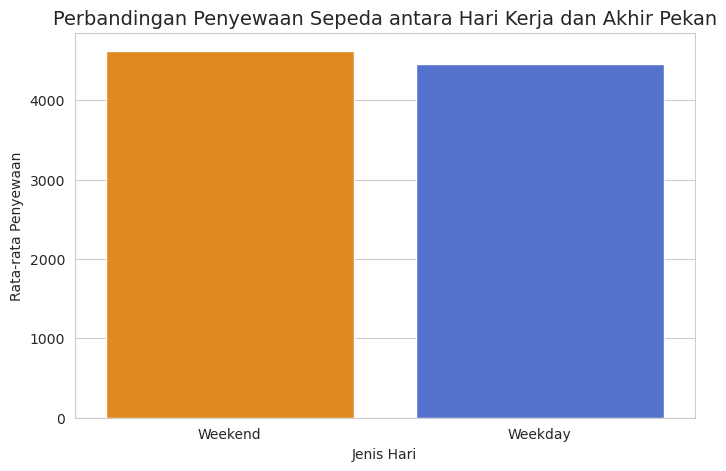

In [29]:
df_cleaned["day_type"] = df_cleaned["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

plt.figure(figsize=(8, 5))
sns.barplot(x="day_type", y="cnt", data=df_cleaned, errorbar=None, hue="day_type", palette={"Weekday": "royalblue", "Weekend": "darkorange"})
plt.legend([], [], frameon=False)
plt.title("Perbandingan Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan", fontsize=14)
plt.xlabel("Jenis Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


# 📊 **Insight dari Analisis Data Penyewaan Sepeda**

## 🚀 **Tren Penyewaan Sepeda (2011 - 2012)**
- **Jumlah penyewaan sepeda meningkat signifikan dari tahun 2011 ke 2012**, menunjukkan tren pertumbuhan yang positif.
- Faktor-faktor yang kemungkinan berkontribusi pada peningkatan ini:
  - **Kesadaran masyarakat** terhadap transportasi ramah lingkungan semakin tinggi.
  - **Ekspansi layanan penyewaan**, termasuk promosi dan kemudahan akses.
  - **Perbaikan infrastruktur**, seperti jalur sepeda dan kebijakan pemerintah yang mendukung mobilitas berkelanjutan.

---

## 🏢 **Perbedaan Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan**
- **Hari kerja memiliki jumlah penyewaan yang lebih tinggi dibanding akhir pekan.**
  - Sepeda digunakan sebagai **moda transportasi utama** untuk bekerja atau sekolah.
- **Penyewaan di akhir pekan tetap signifikan**, meskipun lebih rendah. Hal ini disebabkan oleh:
  - Aktivitas rekreasi, olahraga, atau wisata.
  - Event komunitas yang mendorong penggunaan sepeda.

---


# 🎯 **Kesimpulan dan Rekomendasi**

✅ **Penyewaan sepeda meningkat dari tahun 2011 ke 2012**, menunjukkan pertumbuhan permintaan yang bisa terus didorong dengan strategi pemasaran yang tepat.  
✅ **Pola penggunaan berbeda antara hari kerja dan akhir pekan**, yang mengindikasikan adanya dua segmen pengguna utama: **komuter (weekday) dan rekreasi (weekend).**  

## 🔹 **Strategi dan Rekomendasi**
### 1️⃣ **Optimasi Layanan**
- Menyediakan lebih banyak sepeda di hari kerja untuk memenuhi permintaan tinggi.
- Mengembangkan jalur sepeda yang lebih aman dan nyaman bagi pengguna harian.

### 2️⃣ **Strategi Peningkatan Penyewaan**
- Menawarkan **langganan atau paket khusus untuk pekerja dan pelajar** guna meningkatkan loyalitas pelanggan di hari kerja.
- **Promosi akhir pekan**, seperti diskon, event bersepeda, atau paket wisata sepeda untuk menarik lebih banyak pengguna rekreasi.

---

# 🎯 **Kesimpulan Akhir**
Peningkatan tren penyewaan sepeda menunjukkan bahwa layanan ini memiliki potensi pertumbuhan yang besar. Dengan strategi yang tepat, layanan ini bisa semakin berkembang dan memberikan manfaat lebih luas bagi masyarakat. 🚲